In [1]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.io import arff
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/Vineet Kumar/Downloads/kidnapping.csv")
df.head()


,STATE/UT,YEAR,Purpose,Total No. of cases reported,Male upto 10 years,Female upto 10 years,Male 10-15 years,Female 10-15 years,Male 15-18 years,Female 15-18 years,...,Female 30-50 years,Male above 50 years,Female above 50 years,Total Male,Total Female,Grand Total,Male below 18,Female below 18,Number of children,Label
0,Andhra Pradesh,2001,For Adoption,8,3,1,0,0,0,0,...,0,0,0,3,5,8,3,1,4,F
1,Andhra Pradesh,2001,For Begging,2,0,0,2,0,0,0,...,0,0,0,2,0,2,2,0,2,M
2,Andhra Pradesh,2001,For Camel racing,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,F
3,Andhra Pradesh,2001,For Illicit intercourse,78,0,2,0,25,0,24,...,2,0,0,0,78,78,0,51,51,F
4,Andhra Pradesh,2001,For marriage,339,0,0,0,73,1,164,...,4,0,0,7,332,339,1,237,238,F


In [3]:
df = df.drop(['Total No. of cases reported'], axis=1)
df = df.drop(['Male upto 10 years'], axis=1)
df = df.drop(['Female upto 10 years'], axis=1)
df = df.drop(['Male 10-15 years'], axis=1)
df = df.drop(['Female 10-15 years'], axis=1)
df = df.drop(['Male 15-18 years'], axis=1)
df = df.drop(['Female 15-18 years'], axis=1)
df = df.drop(['Male 18-30 years'], axis=1)
df = df.drop(['Female 18-30 years'], axis=1)
df = df.drop(['Male 30-50 years'], axis=1)
df = df.drop(['Female 30-50 years'], axis=1)
df = df.drop(['Male above 50 years'], axis=1)
df = df.drop(['Female above 50 years'], axis=1)
df = df.drop(['Total Male'], axis=1)
df = df.drop(['Total Female'], axis=1)
df = df.drop(['Male below 18'], axis=1)
df = df.drop(['Female below 18'],axis=1)
df = df.drop(['Number of children'], axis=1)

df.head()

,STATE/UT,YEAR,Purpose,Grand Total,Label
0,Andhra Pradesh,2001,For Adoption,8,F
1,Andhra Pradesh,2001,For Begging,2,M
2,Andhra Pradesh,2001,For Camel racing,0,F
3,Andhra Pradesh,2001,For Illicit intercourse,78,F
4,Andhra Pradesh,2001,For marriage,339,F


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def encode_df(dataframe):
    le = LabelEncoder()
    for column in dataframe.columns:
        dataframe[column] = le.fit_transform(dataframe[column])
    return dataframe

#encode the dataframe
data=encode_df(df)

print(data)

      STATE/UT  YEAR  Purpose  Grand Total  Label
0            1     0        0            8      0
1            1     0        1            2      1
2            1     0        2            0      0
3            1     0        3           78      0
4            1     0       10          278      0
5            1     0        4           36      0
6            1     0        5           13      1
7            1     0        6           47      1
8            1     0        7            0      0
9            1     0        8            0      0
10           1     0        9            0      0
11           1     0       11          164      1
12           1     0       13          358      1
13           1     0       14          552      0
14           1     1        0            0      0
15           1     1        1            6      1
16           1     1        2            0      0
17           1     1        3           98      0
18           1     1       10          302      0


In [5]:
X = df.iloc[:, 0:4].values 
y = df.iloc[:,-1].values 

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [7]:
X_train.shape

(2933, 4)

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0) 

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Import scikit-learn metrics module for accuracy calculation

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

# Model Accuracy, how often is the classifier correct?
print(accuracy_score(y_test, y_pred))

[[2266  118]
 [ 125  424]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2384
           1       0.78      0.77      0.78       549

   micro avg       0.92      0.92      0.92      2933
   macro avg       0.87      0.86      0.86      2933
weighted avg       0.92      0.92      0.92      2933

0.9171496760995568


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0) 

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)  

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Import scikit-learn metrics module for accuracy calculation

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

# Model Accuracy, how often is the classifier correct?
print(accuracy_score(y_test, y_pred))

[[2730  142]
 [ 157  491]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2872
           1       0.78      0.76      0.77       648

   micro avg       0.92      0.92      0.92      3520
   macro avg       0.86      0.85      0.86      3520
weighted avg       0.91      0.92      0.91      3520

0.9150568181818182


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0) 

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Import scikit-learn metrics module for accuracy calculation

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

# Model Accuracy, how often is the classifier correct?
print(accuracy_score(y_test, y_pred))

[[3164  184]
 [ 196  563]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3348
           1       0.75      0.74      0.75       759

   micro avg       0.91      0.91      0.91      4107
   macro avg       0.85      0.84      0.85      4107
weighted avg       0.91      0.91      0.91      4107

0.9074750426101778


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [21]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0) 

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test) 

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Import scikit-learn metrics module for accuracy calculation

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

# Model Accuracy, how often is the classifier correct?
print(accuracy_score(y_test, y_pred))

[[3599  227]
 [ 228  639]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3826
           1       0.74      0.74      0.74       867

   micro avg       0.90      0.90      0.90      4693
   macro avg       0.84      0.84      0.84      4693
weighted avg       0.90      0.90      0.90      4693

0.9030470914127424


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [25]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0) 

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Import scikit-learn metrics module for accuracy calculation

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

# Model Accuracy, how often is the classifier correct?
print(accuracy_score(y_test, y_pred))

[[3992  300]
 [ 265  723]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      4292
           1       0.71      0.73      0.72       988

   micro avg       0.89      0.89      0.89      5280
   macro avg       0.82      0.83      0.83      5280
weighted avg       0.89      0.89      0.89      5280

0.8929924242424242


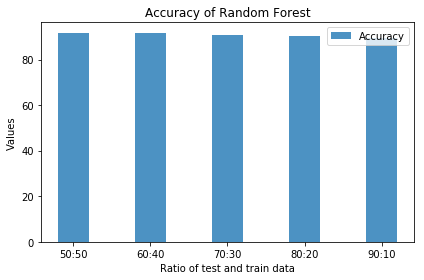

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# data to plot
n_groups =5
accuracy1=91.71
accuracy2=91.50
accuracy3=90.74
accuracy4=90.30
accuracy5=89.29

means_accuracy=(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.40
opacity = 0.8
 
sns.set_color_codes("pastel")
rects1 = plt.bar(index, means_accuracy, bar_width,
                 alpha=opacity,
                 label='Accuracy')
  
plt.xlabel('Ratio of test and train data')
plt.ylabel('Values')
plt.title('Accuracy of Random Forest')
plt.xticks(index, ('50:50', '60:40', '70:30','80:20','90:10'))
plt.legend()
 
plt.tight_layout()
plt.show()